In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('P3- Churn-Modelling Data.xlsx')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churned            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  churned          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 1.  Customer Demographics: 

   - What is the distribution of customers across different age groups?
   

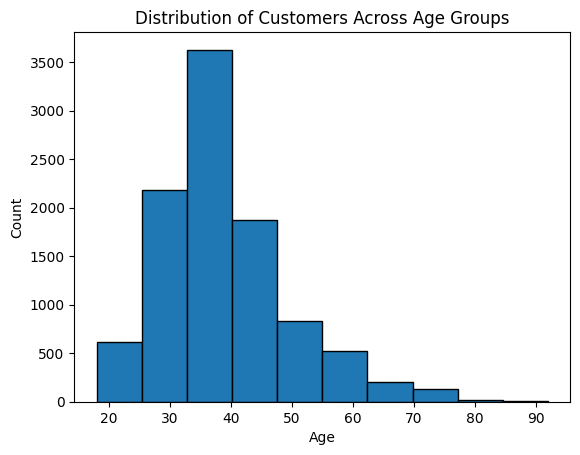

In [8]:

plt.hist(df['Age'], bins=10, edgecolor='black')

plt.title('Distribution of Customers Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

   - Analyze the gender distribution of customers.

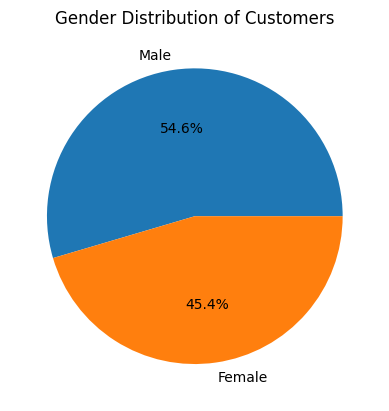

In [9]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.ylabel('')
plt.show()

## 2.  Churn Analysis: 

   - What percentage of customers have churned?

In [10]:
df['churned'].value_counts(normalize=True) * 100


churned
0    79.63
1    20.37
Name: proportion, dtype: float64

   - What are the main reasons for customer churn?

In [11]:
#using chi2 test to check if there is a significant relationship between the categorical variables and the target variable
from scipy.stats import chi2_contingency

categorical_vars = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['churned'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Variable: {var}")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print("")


Variable: Geography
Chi-square statistic: 301.25533682434536
P-value: 3.8303176053541544e-66

Variable: Gender
Chi-square statistic: 112.91857062096116
P-value: 2.2482100097131755e-26

Variable: NumOfProducts
Chi-square statistic: 1503.6293615070408
P-value: 0.0

Variable: HasCrCard
Chi-square statistic: 0.47133779904440803
P-value: 0.49237236141554697

Variable: IsActiveMember
Chi-square statistic: 242.98534164287963
P-value: 8.785858269303705e-55



Using the chisquare statistical test we can conclude that the categorical features in the dataset do not have any major impact on customer churn singularly, assuming the null hypothesis that there is no association between customer churn and the other features, NumOfProducts has the highest statistic to effect the customer churn, setting the threshold to 0.0, no other columns reject the null hypothesis

   - Identify any patterns or trends among customers who have churned.

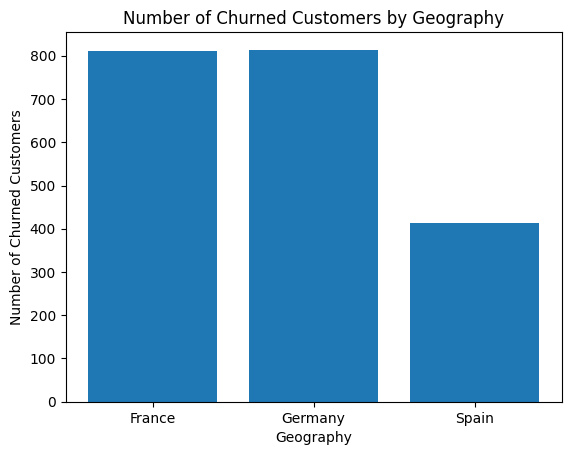

In [12]:
churned_counts = df.groupby('Geography')['churned'].sum()

plt.bar(churned_counts.index, churned_counts.values)
plt.xlabel('Geography')
plt.ylabel('Number of Churned Customers')
plt.title('Number of Churned Customers by Geography')
plt.show()

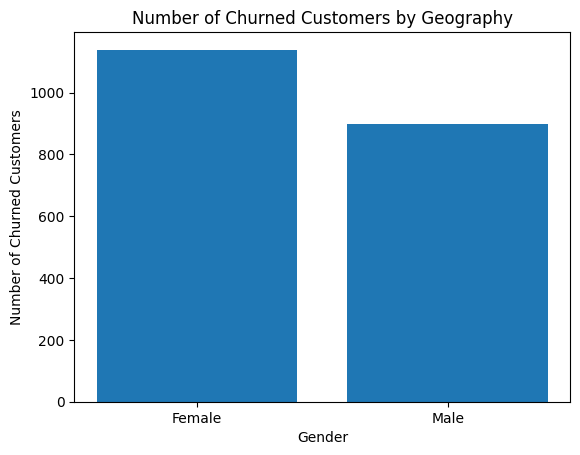

In [13]:
churned_counts = df.groupby('Gender')['churned'].sum()

plt.bar(churned_counts.index, churned_counts.values)
plt.xlabel('Gender')
plt.ylabel('Number of Churned Customers')
plt.title('Number of Churned Customers by Geography')
plt.show()

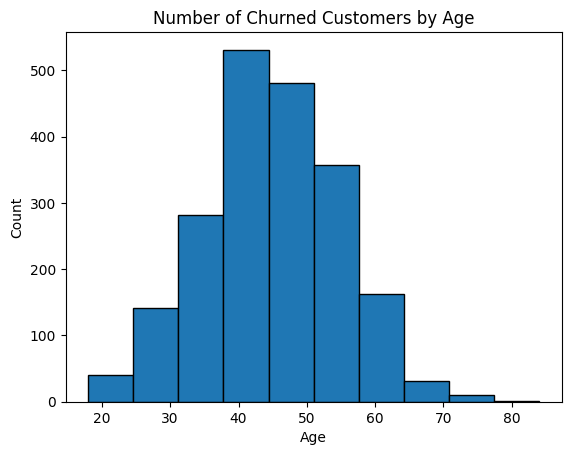

In [14]:
plt.hist(df[df['churned'] == 1]['Age'], bins=10, edgecolor='black')

plt.title('Number of Churned Customers by Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

## 3.  Product Usage: 

   - What are the most commonly used products or services?

   - Analyze the usage patterns of different customer segments.

In [15]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churned'],
      dtype='object')

Product/Services column not present in the dataset

## 4.  Financial Analysis: 

   - What is the average account balance of customers?

In [16]:
print('Average Balance of Customers:', df['Balance'].mean())

Average Balance of Customers: 76485.889288


   - Compare the financial characteristics of churned vs. non-churned customers.

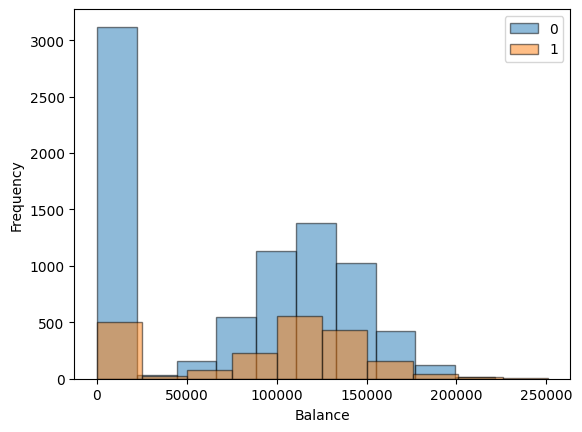

In [17]:
df.groupby('churned')['Balance'].plot(kind='hist', bins=10, alpha=0.5, legend=True, edgecolor='black')
x = plt.xlabel('Balance')
plt.show()

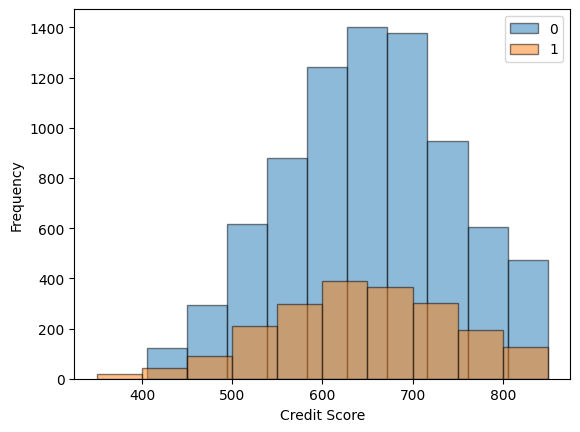

In [18]:
df.groupby('churned')['CreditScore'].plot(kind='hist', bins=10, alpha=0.5, legend=True, edgecolor='black')
plt.xlabel('Credit Score')
plt.show()

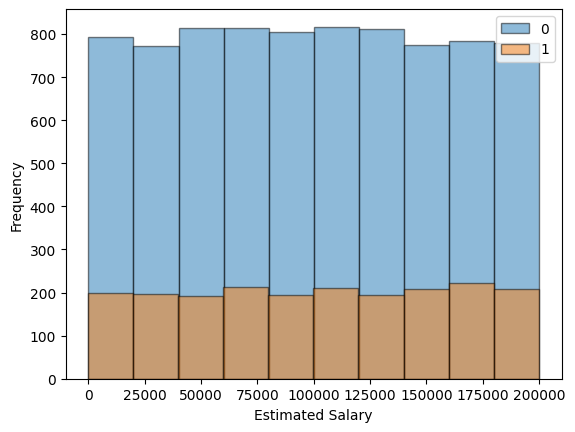

In [19]:
df.groupby('churned')['EstimatedSalary'].plot(kind='hist', bins=10, alpha=0.5, legend=True, edgecolor='black')
plt.xlabel('Estimated Salary')
plt.show()

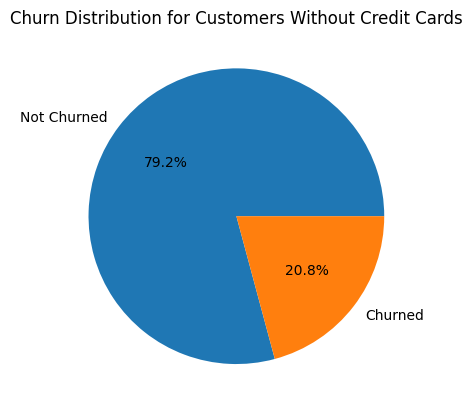

In [20]:
no_credit_card_df = df[df['HasCrCard'] == 0]

churn_counts = no_credit_card_df['churned'].value_counts()

plt.pie(churn_counts, labels=churn_counts.index.map({0: 'Not Churned', 1: 'Churned'}), autopct='%1.1f%%')
plt.title('Churn Distribution for Customers Without Credit Cards')
plt.show()

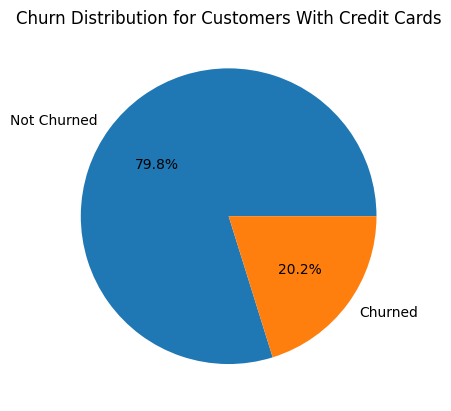

In [21]:
no_credit_card_df = df[df['HasCrCard'] == 1]

churn_counts = no_credit_card_df['churned'].value_counts()

plt.pie(churn_counts, labels=churn_counts.index.map({0: 'Not Churned', 1: 'Churned'}), autopct='%1.1f%%')
plt.title('Churn Distribution for Customers With Credit Cards')
plt.show()

## 5.  Predictive Modeling: 

In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import joblib

In [23]:
#Converting Geography column to Boolean value using One hot encoding
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [24]:
df['Gender']=df['Gender'].map({'Female':0, 'Male':1})

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [26]:
X = df.drop(columns=['CustomerId', 'Surname', 'churned', 'RowNumber'])
y = df['churned']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   - Which factors are the most significant predictors of customer churn?



In [28]:
#Training an initial XGBoost model to compute feature importances
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(5)['Feature'].tolist()

print("Top 5 most significant predictors of customer churn when using XGBoost model:")
print(top_features)


Top 5 most significant predictors of customer churn when using XGBoost model:
['NumOfProducts', 'IsActiveMember', 'Age', 'Geography_Germany', 'Balance']


Used the inbuilt feature importance function in the XGBoost library to find out the most significant features for prediction

   - Develop a predictive model to identify at-risk customers.

In [30]:
#Using the top 5 features to create a new model
X_train_top5 = X_train[top_features]
X_test_top5 = X_test[top_features]

In [31]:
#Performing Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_top5, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [32]:
#Training the best model
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train_top5, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
#Printing the classification report
y_pred = best_model.predict(X_test_top5)
report = classification_report(y_test, y_pred)

print("Accuracy Report:")
print(report)

Accuracy Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [34]:
#Saving the model for future use
joblib.dump(best_model, 'model.pkl')

['model.pkl']